## Brain Tumors Classification Using CNN

In [1]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
data_path = r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\bt_images'

# Construct full paths for the pickle files
training_data_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\training_data.pickle')
labels_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\labels.pickle')
test_data_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\test_images-20210704T210303Z-001\test_images')

# Load the pickle files
with open(training_data_path, 'rb') as training_data_file:
    training_data = pickle.load(training_data_file)

with open(labels_path, 'rb') as labels_file:
    labels = pickle.load(labels_file)

In [3]:
from PIL import Image

# Open an image
image_path = r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\bt_images\1.jpg'
img = Image.open(image_path)

# Get the dimensions (width and height) of the image
width, height = img.size

print("Image Width:", width)
print("Image Height:", height)

Image Width: 512

Image Height: 512


In [4]:
# Convert to NumPy arrays and normalize.
training_data = np.array(training_data)
labels = np.array(labels)

C:\Users\SaWa\AppData\Local\Temp\ipykernel_2892\1410008418.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

  training_data = np.array(training_data)


In [5]:
training_data.shape

(3064, 2)

In [6]:
labels.shape

(3064,)

In [7]:
unique_labels = np.unique(labels)
print("Unique Label Values:", unique_labels)

Unique Label Values: [1 2 3]


In [8]:
# Subtract 1 from each label to make them start from 0
adjusted_labels = labels - 1

In [9]:
unique_labels1 = np.unique(adjusted_labels)
print("Unique Label Values:", unique_labels1)

Unique Label Values: [0 1 2]


In [10]:
# Get a list of all files in the folder
file_list = os.listdir(data_path)

In [11]:
# Filter out only image files (e.g., JPG, PNG, etc.)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

In [12]:
# List to store processed image data
image_data = []

for image_file in image_files:
    image_path = os.path.join(data_path, image_file)
    img = Image.open(image_path)
    
    # Convert to RGB format if not already
    img = img.convert('RGB')
    
    # Resize the image to the desired dimensions
    img = img.resize((224, 224))
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    # Normalize pixel values and convert to NumPy array
    img_array = np.array(img) / 255.0  
    
    # Append the processed image array to the list
    image_data.append(img_array)

In [13]:
# Convert the list of processed image arrays to a NumPy array
images_array = np.array(image_data)

In [14]:
# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, adjusted_labels, test_size=0.2, random_state=42)

In [15]:
# Convert labels to categorical format
num_classes = len(np.unique(adjusted_labels))
train_labels_categorical = to_categorical(train_labels, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes=num_classes)

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
batch_size = 32
epochs = 10

history = model.fit(train_images, train_labels_categorical,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels_categorical))

Epoch 1/10

77/77 [==============================] - 111s 1s/step - loss: 0.7385 - accuracy: 0.6761 - val_loss: 0.5648 - val_accuracy: 0.8075

Epoch 2/10

77/77 [==============================] - 104s 1s/step - loss: 0.5193 - accuracy: 0.7931 - val_loss: 0.4314 - val_accuracy: 0.8369

Epoch 3/10

77/77 [==============================] - 108s 1s/step - loss: 0.4252 - accuracy: 0.8319 - val_loss: 0.3913 - val_accuracy: 0.8434

Epoch 4/10

77/77 [==============================] - 105s 1s/step - loss: 0.3471 - accuracy: 0.8682 - val_loss: 0.3360 - val_accuracy: 0.8597

Epoch 5/10

77/77 [==============================] - 105s 1s/step - loss: 0.2794 - accuracy: 0.8935 - val_loss: 0.2958 - val_accuracy: 0.8874

Epoch 6/10

77/77 [==============================] - 111s 1s/step - loss: 0.2225 - accuracy: 0.9217 - val_loss: 0.2587 - val_accuracy: 0.9054

Epoch 7/10

77/77 [==============================] - 111s 1s/step - loss: 0.1792 - accuracy: 0.9380 - val_loss: 0.2652 - val_accuracy: 0.8940


In [19]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical, verbose=2)
print("Test accuracy:", test_accuracy)

20/20 - 6s - loss: 0.2784 - accuracy: 0.9201 - 6s/epoch - 282ms/step

Test accuracy: 0.9200652241706848


### Evaluation using confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have predictions from your model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to labels

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = np.argmax(test_labels_categorical, axis=1)

# Generate confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

20/20 [==============================] - 6s 277ms/step

Confusion Matrix:

[[145   6  10]

 [  2 238  29]

 [  0   2 181]]


### Evaluation using area under the curve

In [21]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions from your model
predictions = model.predict(test_images)

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = test_labels_categorical[:, 1]  # Assuming the positive class is index 1

# Calculate AUC
auc = roc_auc_score(true_labels, predictions[:, 1])  # Assuming the positive class is index 1

# Print AUC and test accuracy
print("AUC:", auc)
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 5s 263ms/step

AUC: 0.9806561770554163

Test accuracy: 0.9200652241706848


### Graph for loss and accuracy

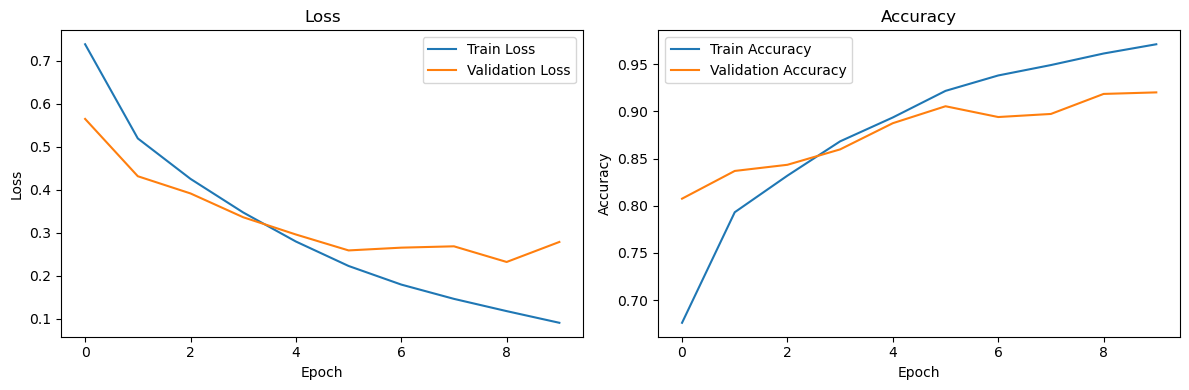

In [23]:
import matplotlib.pyplot as plt 

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Precision, Recall, F1 score from classification report

In [24]:
from sklearn.metrics import classification_report

# Assuming you have predictions from your model
predictions = model.predict(test_images)

true_labels = np.argmax(test_labels_categorical, axis=1)

# Generate classification report
class_names = ["Pituitary", "Meningioma", "Glioma"]  
report = classification_report(true_labels, np.argmax(predictions, axis=1), target_names=class_names)

print("Classification Report:\n", report)

20/20 [==============================] - 6s 275ms/step

Classification Report:

               precision    recall  f1-score   support



   Pituitary       0.99      0.90      0.94       161

  Meningioma       0.97      0.88      0.92       269

      Glioma       0.82      0.99      0.90       183



    accuracy                           0.92       613

   macro avg       0.93      0.92      0.92       613

weighted avg       0.93      0.92      0.92       613


